<a href="https://colab.research.google.com/github/HwiTran/Natural-Language-Processing-Course/blob/main/Week_6_BERT_XLnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install datasets transformers

# Mini-project 1

Apply Transformers & its variants for a text classification problem.

## Problem statement
- Given a set of Transformers variants and a text classification dataset. Your task is to make a complete pipeline from input to output.
- Your pipeline **SHOULD** include the following required components. Each component **SHOULD** be organized into different `class` object.
    - Load & discover dataset
    - Preprocess data
    - Tokenize data
    - Create a DataLoader
    - Build or load model
    - Create a training workflow
    - Set up hyperparameters for training procedure
    - Train model
    - Evaluate model
    - **Hyperparameters tuning**
    - Infer model


## Dataset demonstration
In this project, we would conduct classification on [IMDb dataset](https://ai.stanford.edu/~amaas/data/sentiment/), which is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. This dataset provides a set of 25 000 highly polar movie reviews for training, and 25 000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

In [53]:
from datasets import load_dataset

In [54]:
imdb_dataset = load_dataset("imdb")

### Train set

In [55]:
imdb_train_set = imdb_dataset["train"]
imdb_train_set

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [56]:
imdb_train_set[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

### Test set

In [57]:
imdb_test_set = imdb_dataset["test"]
imdb_test_set

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [58]:
imdb_test_set[0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

## List of models for this project

In [59]:
import torch
from torch import nn

### BERT
- BERT is a deep learning language model designed to improve the efficiency of natural language processing (NLP) tasks. It is famous for its ability to consider context by analyzing the relationships between words in a sentence bidirectionally. It was introduced by Google researchers in a 2018 paper titled “BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.” Since then, the BERT model has been fine-tuned for use in a variety of fields, including biology, data science, and medicine.

- You could discover [BERT documentation](https://huggingface.co/docs/transformers/en/model_doc/bert) from transformers library @ Huggingface for more details.

- Examples of training use case for Huggingface model: [Huggingface training](https://huggingface.co/docs/transformers/en/training)

In [60]:
'''from transformers import (
    BertForSequenceClassification,
    BertTokenizer
) '''

'from transformers import (\n    BertForSequenceClassification,\n    BertTokenizer\n) '

In [61]:
'''# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)'''

"# Load tokenizer\ntokenizer = BertTokenizer.from_pretrained('bert-base-uncased',\n                                          do_lower_case=True)"

In [62]:
'''example = imdb_train_set[0]['text']
print(' Original: ', example)

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(example))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(example)))'''

"example = imdb_train_set[0]['text']\nprint(' Original: ', example)\n\n# Print the sentence split into tokens.\nprint('Tokenized: ', tokenizer.tokenize(example))\n\n# Print the sentence mapped to token ids.\nprint('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(example)))"

In [63]:
'''# Load model
bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 1
)

bert_model'''

'# Load model\nbert_model = BertForSequenceClassification.from_pretrained(\n    "bert-base-uncased",\n    num_labels = 1\n)\n\nbert_model'

In [64]:
'''# QC
example_tensor = torch.ones(1, 512).type(torch.long)
example_bert_output = bert_model(example_tensor)
example_bert_output'''

'# QC\nexample_tensor = torch.ones(1, 512).type(torch.long)\nexample_bert_output = bert_model(example_tensor)\nexample_bert_output'

### XLNet

The XLNet model was proposed in XLNet: Generalized Autoregressive Pretraining for Language Understanding by ([Yang et al., 2019](https://arxiv.org/pdf/1906.08237)). XLnet is an extension of the Transformer-XL model pre-trained using an autoregressive method to learn bidirectional contexts by maximizing the expected likelihood over all permutations of the input sequence factorization order.

In [65]:
'''from transformers import XLNetTokenizer, XLNetForSequenceClassification'''

'from transformers import XLNetTokenizer, XLNetForSequenceClassification'

In [66]:
'''tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

tokenized_texts = imdb_train_set[0]['text']
tokenizer(tokenized_texts)'''

"tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)\n\ntokenized_texts = imdb_train_set[0]['text']\ntokenizer(tokenized_texts)"

In [67]:
'''model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased",
                                                       num_labels=1)
model'''

'model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased",\n                                                       num_labels=1)\nmodel'

In [68]:
'''# QC
example_tensor = torch.ones(1, 768).type(torch.long)
example_xlnet_output = model(example_tensor)
example_xlnet_output'''

'# QC\nexample_tensor = torch.ones(1, 768).type(torch.long)\nexample_xlnet_output = model(example_tensor)\nexample_xlnet_output'

# Data Exploration


In [69]:
imdb_train_set[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [70]:
#Get detailed information about feature in dataset
imdb_train_set.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [71]:
#Data type of feature in dataset
print("Data type of 'text' feature:",imdb_train_set.features['text'].dtype)
print("Data type of 'label' feature:",imdb_train_set.features['label'].dtype)

Data type of 'text' feature: string
Data type of 'label' feature: int64


In [72]:
#Count sum of sample and check null value in dataset
print(f"Total number of samples: {len(imdb_train_set)}")
print(f"Total number of samples in 'text' feature: {len(imdb_train_set['text'])}" )
print(f"Total number of samples in 'label' feature: {len(imdb_train_set['label'])}" )

Total number of samples: 25000
Total number of samples in 'text' feature: 25000
Total number of samples in 'label' feature: 25000


Dataset not have null value

In [73]:
imdb_train_set.features['label'].names

['neg', 'pos']

12500 12500


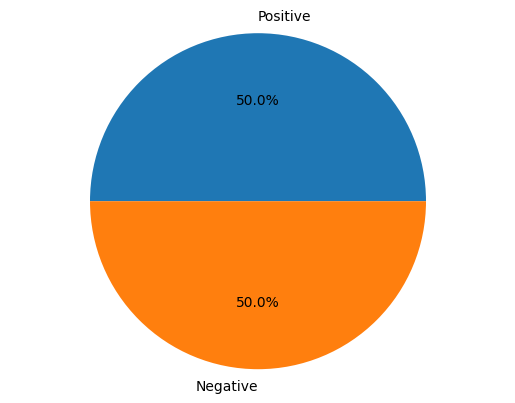

In [74]:
#Check the balance of the 'label' feature
positive_count = imdb_train_set['label'].count(0)
negative_count = imdb_train_set['label'].count(1)
print(positive_count, negative_count)

#Visualize in pie chart
import matplotlib.pyplot as plt
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


In [75]:
# Print 1 sample have 'label' is 0 and 1 for another llabel

found_label_0 = False  # Flag to track if label 0 is found
for sample in imdb_train_set:
    if sample['label'] == 0:
        text = sample['text']
        label = sample['label']
        print("Text:", text)
        print("Label:", label)
        found_label_0 = True
        break  # Exit the loop after finding one sample

found_label_1 = False  # Flag to track if label 0 is found
for sample in imdb_train_set:
    if sample['label'] == 1:
        text = sample['text']
        label = sample['label']
        print("Text:", text)
        print("Label:", label)
        found_label_1 = True
        break  # Exit the loop after finding one sample

Text: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far betwee

# Preprocess data

# BERT

## Tokenize data

In [ ]:
#Load tokenizer
from transformers import AutoTokenizer

tokenizer_BERT = AutoTokenizer.from_pretrained("distilbert-base-uncased")

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.17.0",
  "vocab_size": 30522
}

loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10

In [ ]:
def tokenize_function(data):
    return tokenizer_BERT(data["text"], padding="max_length", truncation=True)



In [ ]:
tokenized_BERT = imdb_dataset.map(tokenize_function, batched=True)

In [ ]:
tokenized_BERT

## Load model


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

BERT = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [ ]:
from transformers import DataCollatorWithPadding

data_collator_BERT = DataCollatorWithPadding(tokenizer=tokenized_BERT)

In [ ]:
data_collator_BERT

In [ ]:
#Fix problem with TrainingArguments
!pip install transformers==4.17

## Set up hyperparameters for training procedure

In [ ]:
training_args = TrainingArguments(
    output_dir="result_BERT",
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
)

trainer_BERT = Trainer(
    model=BERT,
    args=training_args,
    train_dataset=tokenized_BERT["train"],
    eval_dataset=tokenized_BERT["test"],
    tokenizer=tokenized_BERT,
    data_collator=data_collator_BERT,
)



## Train model

In [ ]:
trainer_BERT.train()

## Hyperparameters tuning

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer_BERT")

## Evaluate

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
compute_metrics(trainer.evaluate())

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer_BERT", evaluation_strategy="epoch")

In [ ]:
trainer_BERT.evaluate()

# XLNET

## Load model

In [ ]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification
XLNET= XLNetForSequenceClassification.from_pretrained("xlnet-base-cased",
                                                       num_labels=1)
XLNET

## Tokenize data

In [ ]:
#Load Tokenizer
from transformers import XLNetTokenizer, XLNetForSequenceClassification
tokenizer_XLNET = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

In [ ]:
def tokenize_function(data):
    return tokenizer_XLNET(data["text"], padding="max_length", truncation=True)

In [ ]:
tokenized_XLNET = imdb_dataset.map(tokenize_function, batched=True)

In [ ]:
from transformers import DataCollatorWithPadding

data_collator_XLNET = DataCollatorWithPadding(tokenizer=tokenized_BERT)

## Set up hyperparameters for training procedure

In [ ]:
training_args = TrainingArguments(
    output_dir="result_XLNET",
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
)

trainer_XLNET = Trainer(
    model=tokenizer_XLNET,
    args=training_args,
    train_dataset=tokenized_XLNET["train"],
    eval_dataset=tokenized_XLNET["test"],
    tokenizer=tokenizer_XLNET,
    data_collator=data_collator_XLNET,

)



## Train model

In [ ]:
trainer_XLNET.train()

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer_XLNet")

## Evaluate

In [ ]:
trainer_XLNET.evaluate()

# Inference